# CJ 올리브네트윅스

In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import table
import csv
import time
%matplotlib inline


import seaborn as sns
plt.style.use('ggplot')


import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)
import warnings
warnings.filterwarnings(action='ignore')
pd.options.display.float_format = '{:.2f}'.format

In [2]:
print (mpl.matplotlib_fname())

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


# 데이터 분석 작업 시작

##### 파일 호출

In [3]:
delivery=pd.read_excel('2020 빅콘테스트_CJ올리브네트웍스_제공DB.xlsx',encoding='utf-8')
delivery

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21
...,...,...,...,...,...,...,...,...,...,...
156566,200531,패션의류,19,대구광역시,27,수성구,26,범물2동,662,22
156567,200531,패션의류,19,서울특별시,11,중구,14,약수동,635,21
156568,200531,패션잡화,20,대구광역시,27,수성구,26,범물2동,662,14
156569,200531,패션잡화,20,서울특별시,11,노원구,35,상계6.7동,695,25


In [4]:
d=[]
for i in range(156571):
    d.append(delivery['CTPV_NM'][i]+' '+delivery['CTGG_NM'][i])


delivery1=pd.DataFrame({'배송년월':list(delivery['DL_YMD']),
                          '상품': list(delivery['DL_GD_LCLS_NM']),
                         '시도': list(delivery['CTPV_NM']),
                         '시군구':d,
                         '송장건수':list(delivery['INVC_CONT'])})
delivery1

,배송년월,상품,시도,시군구,송장건수
0,190201,도서/음반,서울특별시,서울특별시 중구,16
1,190201,가구/인테리어,서울특별시,서울특별시 중구,4
2,190201,가구/인테리어,대구광역시,대구광역시 중구,1
3,190201,도서/음반,대구광역시,대구광역시 중구,6
4,190201,디지털/가전,대구광역시,대구광역시 수성구,21
...,...,...,...,...,...
156566,200531,패션의류,대구광역시,대구광역시 수성구,22
156567,200531,패션의류,서울특별시,서울특별시 중구,21
156568,200531,패션잡화,대구광역시,대구광역시 수성구,14
156569,200531,패션잡화,서울특별시,서울특별시 노원구,25


In [5]:
b=[]
for i in range(156571):
    k=str(delivery1['배송년월'][i])[0:4]
    b.append(k)

delivery1['배송년월']=b
delivery1

,배송년월,상품,시도,시군구,송장건수
0,1902,도서/음반,서울특별시,서울특별시 중구,16
1,1902,가구/인테리어,서울특별시,서울특별시 중구,4
2,1902,가구/인테리어,대구광역시,대구광역시 중구,1
3,1902,도서/음반,대구광역시,대구광역시 중구,6
4,1902,디지털/가전,대구광역시,대구광역시 수성구,21
...,...,...,...,...,...
156566,2005,패션의류,대구광역시,대구광역시 수성구,22
156567,2005,패션의류,서울특별시,서울특별시 중구,21
156568,2005,패션잡화,대구광역시,대구광역시 수성구,14
156569,2005,패션잡화,서울특별시,서울특별시 노원구,25


In [6]:
delivery.isnull().any()

DL_YMD           False
DL_GD_LCLS_NM    False
DL_GD_LCLS_CD    False
CTPV_NM          False
CTPV_CD          False
CTGG_NM          False
CTGG_CD          False
HDNG_NM          False
HDNG_CD          False
INVC_CONT        False
dtype: bool

In [7]:
#20년도 데이터는 76892번째 부터
k=0
for i in range(156571):
    a=str(delivery['DL_YMD'][i])[0:2]
    if a=='20':
        print(k)
        break
    else:
        k+=1

76892


In [8]:
#연도별로 데이터 나누기
year_19 = delivery[0:76892]
year_20 = delivery[76892:156572].reset_index(drop=True)
year_19

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21
...,...,...,...,...,...,...,...,...,...,...
76887,190531,패션잡화,20,서울특별시,11,중구,14,청구동,645,55
76888,190531,화장품/미용,21,대구광역시,27,수성구,26,범어2동,520,120
76889,190531,화장품/미용,21,서울특별시,11,중구,14,다산동,625,74
76890,190531,패션의류,19,대구광역시,27,중구,11,대신동,595,150


In [9]:
year_20

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT
0,200201,가구/인테리어,10,대구광역시,27,수성구,26,범어3동,530,3
1,200201,도서/음반,12,서울특별시,11,노원구,35,월계1동,560,24
2,200201,가구/인테리어,10,대구광역시,27,수성구,26,범물2동,662,3
3,200201,가구/인테리어,10,서울특별시,11,노원구,35,상계3.4동,665,4
4,200201,도서/음반,12,대구광역시,27,수성구,26,수성1가동,570,34
...,...,...,...,...,...,...,...,...,...,...
79674,200531,패션의류,19,대구광역시,27,수성구,26,범물2동,662,22
79675,200531,패션의류,19,서울특별시,11,중구,14,약수동,635,21
79676,200531,패션잡화,20,대구광역시,27,수성구,26,범물2동,662,14
79677,200531,패션잡화,20,서울특별시,11,노원구,35,상계6.7동,695,25


In [10]:
#배송 년월일 -> 년월로 수정
a=[]
for i in range(76892):
    k=str(year_19['DL_YMD'][i])[0:4]
    a.append(k)
    
year_19['DL_YMD']=a
year_19

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT
0,1902,도서/음반,12,서울특별시,11,중구,14,동화동,665,16
1,1902,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4
2,1902,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1
3,1902,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6
4,1902,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21
...,...,...,...,...,...,...,...,...,...,...
76887,1905,패션잡화,20,서울특별시,11,중구,14,청구동,645,55
76888,1905,화장품/미용,21,대구광역시,27,수성구,26,범어2동,520,120
76889,1905,화장품/미용,21,서울특별시,11,중구,14,다산동,625,74
76890,1905,패션의류,19,대구광역시,27,중구,11,대신동,595,150


In [11]:
# 시도 시군구 합치기 
c=[]
for i in range(76892):
    c.append(year_19['CTPV_NM'][i]+' '+year_19['CTGG_NM'][i])


delivery_19=pd.DataFrame({'배송년월':list(year_19['DL_YMD']),
                          '상품': list(year_19['DL_GD_LCLS_NM']),
                         '시도': list(year_19['CTPV_NM']),
                         '시군구':c,
                         '송장건수':list(year_19['INVC_CONT'])})
delivery_19

,배송년월,상품,시도,시군구,송장건수
0,1902,도서/음반,서울특별시,서울특별시 중구,16
1,1902,가구/인테리어,서울특별시,서울특별시 중구,4
2,1902,가구/인테리어,대구광역시,대구광역시 중구,1
3,1902,도서/음반,대구광역시,대구광역시 중구,6
4,1902,디지털/가전,대구광역시,대구광역시 수성구,21
...,...,...,...,...,...
76887,1905,패션잡화,서울특별시,서울특별시 중구,55
76888,1905,화장품/미용,대구광역시,대구광역시 수성구,120
76889,1905,화장품/미용,서울특별시,서울특별시 중구,74
76890,1905,패션의류,대구광역시,대구광역시 중구,150


In [12]:
b=[]
for i in range(79679):
    k=str(year_20['DL_YMD'][i])[0:4]
    b.append(k)

year_20['DL_YMD']=b
year_20

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT
0,2002,가구/인테리어,10,대구광역시,27,수성구,26,범어3동,530,3
1,2002,도서/음반,12,서울특별시,11,노원구,35,월계1동,560,24
2,2002,가구/인테리어,10,대구광역시,27,수성구,26,범물2동,662,3
3,2002,가구/인테리어,10,서울특별시,11,노원구,35,상계3.4동,665,4
4,2002,도서/음반,12,대구광역시,27,수성구,26,수성1가동,570,34
...,...,...,...,...,...,...,...,...,...,...
79674,2005,패션의류,19,대구광역시,27,수성구,26,범물2동,662,22
79675,2005,패션의류,19,서울특별시,11,중구,14,약수동,635,21
79676,2005,패션잡화,20,대구광역시,27,수성구,26,범물2동,662,14
79677,2005,패션잡화,20,서울특별시,11,노원구,35,상계6.7동,695,25


In [13]:
d=[]
for i in range(79679):
    d.append(year_20['CTPV_NM'][i]+' '+year_20['CTGG_NM'][i])

delivery_20=pd.DataFrame({'배송년월':list(year_20['DL_YMD']),
                          '상품': list(year_20['DL_GD_LCLS_NM']),
                         '시도': list(year_20['CTPV_NM']),
                         '시군구':d,
                         '송장건수':list(year_20['INVC_CONT'])})
delivery_20

,배송년월,상품,시도,시군구,송장건수
0,2002,가구/인테리어,대구광역시,대구광역시 수성구,3
1,2002,도서/음반,서울특별시,서울특별시 노원구,24
2,2002,가구/인테리어,대구광역시,대구광역시 수성구,3
3,2002,가구/인테리어,서울특별시,서울특별시 노원구,4
4,2002,도서/음반,대구광역시,대구광역시 수성구,34
...,...,...,...,...,...
79674,2005,패션의류,대구광역시,대구광역시 수성구,22
79675,2005,패션의류,서울특별시,서울특별시 중구,21
79676,2005,패션잡화,대구광역시,대구광역시 수성구,14
79677,2005,패션잡화,서울특별시,서울특별시 노원구,25


## 연도별 송장건수 비교
20년도에 송장건수가 증가한 것을 알 수 있다.

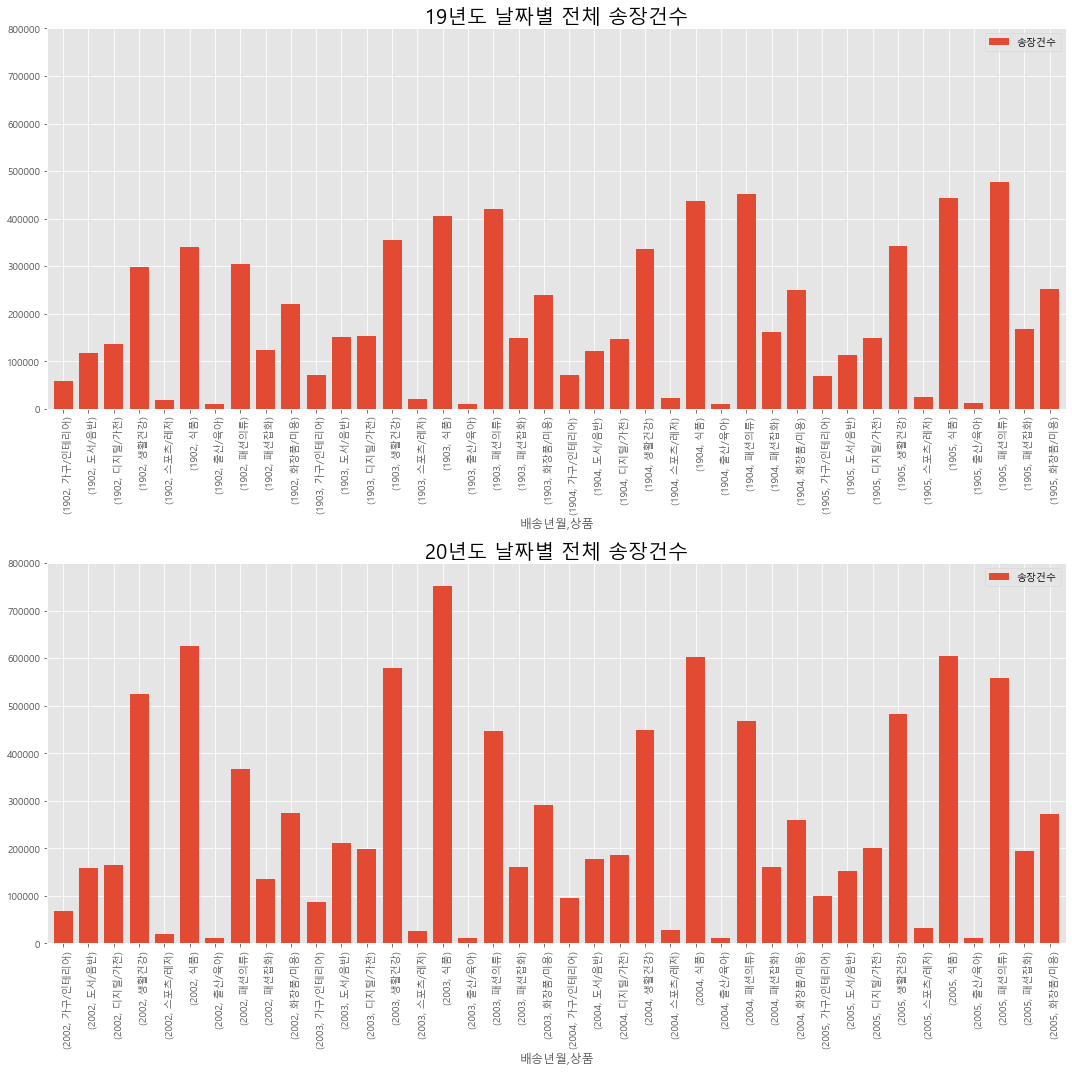

In [14]:
#연도 날짜별 각 품목 송장건수 비교
fig,axes=plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(15,15)

all_19=pd.DataFrame(delivery_19['송장건수'].groupby([delivery_19['배송년월'],delivery_19['상품']]).sum())
all_19.plot(kind='bar',width=0.75,ax=axes[0])
plt.setp(axes[0].get_xticklabels(), rotation=90, ha='left')
axes[0].set_ylim(0,800000)
axes[0].set_title('19년도 날짜별 전체 송장건수',size=20)


all_20=pd.DataFrame(delivery_20['송장건수'].groupby([delivery_20['배송년월'],delivery_20['상품']]).sum())
all_20.plot(kind='bar',width=0.75,ax=axes[1])
plt.setp(axes[1].get_xticklabels(), rotation=90, ha='left')
axes[1].set_ylim(0,800000)
axes[1].set_title('20년도 날짜별 전체 송장건수',size=20)

plt.tight_layout()
plt.show()

In [15]:
#19년도 전체 품목별 송장빈도
count_item19 = pd.DataFrame(year_19['INVC_CONT'].groupby(year_19['DL_GD_LCLS_NM']).sum())
count_item19=count_item19.sort_values(by='INVC_CONT' ,ascending=False)
item19=[]
for i in range(10):
    item19.append(count_item19.index[i])
item19

['패션의류',
 '식품',
 '생활건강',
 '화장품/미용',
 '패션잡화',
 '디지털/가전',
 '도서/음반',
 '가구/인테리어',
 '스포츠/레저',
 '출산/육아']

In [16]:
#20년도 전체 품목별 송장빈도
count_item20 = pd.DataFrame(year_20['INVC_CONT'].groupby(year_20['DL_GD_LCLS_NM']).sum())
count_item20=count_item20.sort_values(by='INVC_CONT' ,ascending=False)
item20=[]
for i in range(10):
    item20.append(count_item20.index[i])
item20

['식품',
 '생활건강',
 '패션의류',
 '화장품/미용',
 '디지털/가전',
 '도서/음반',
 '패션잡화',
 '가구/인테리어',
 '스포츠/레저',
 '출산/육아']

In [17]:
list(count_item20)

['INVC_CONT']

In [18]:
sum_item19=0
sum_item20=0
for i in range(10):
    sum_item19=sum_item19+count_item19['INVC_CONT'][i]
    sum_item20=sum_item20+count_item20['INVC_CONT'][i]
print('19년도 전체 송장 수:',sum_item19)
print('20년도 전체 송장 수:',sum_item20)

19년도 전체 송장 수: 7663651
20년도 전체 송장 수: 10161823


In [19]:
print('송장 증가율:',(round((sum_item20-sum_item19)/sum_item19*100)),'%')

송장 증가율: 33.0 %


In [20]:
per_invc_19=[]
per_invc_20=[]
item=[]
for i in range(10):
    a=round((count_item19['INVC_CONT'][i]/sum_item19)*100,1)
    b=round((count_item20['INVC_CONT'][i]/sum_item20)*100,1)
    per_invc_19.append(a)
    per_invc_20.append(b)

    
df1=pd.DataFrame({'상품':item19,
                 '19년도 비율':per_invc_19})

df2=pd.DataFrame({'상품':item20,
                 '20년도 비율':per_invc_20})
#count_item19['per_invc']=per_invc_19
#count_item20['per_invc']=per_invc_20
#del count_item19['INVC_CONT']
#del count_item20['INVC_CONT']
#count_item19.reset_index()
#count_item20.reset_index()
df3=pd.merge(df1,df2, on='상품')
df3

,상품,19년도 비율,20년도 비율
0,패션의류,21.50,18.10
1,식품,21.20,25.40
2,생활건강,17.40,20.00
3,화장품/미용,12.50,10.80
4,패션잡화,7.90,6.40
5,디지털/가전,7.60,7.40
6,도서/음반,6.60,6.90
7,가구/인테리어,3.50,3.50
8,스포츠/레저,1.10,1.00
9,출산/육아,0.60,0.50


## 송장빈도 연도별 비율
1. 식품은 전년대비 4.2% 증가
2. 생활건강은 전년대비 2.6% 증가
3. 화장품/미용이 전년대비 1.7% 증가
4. 패션의류는 전년대비 3.4% 감소
5. 나머지 지역은 전체적으로 비슷하다.

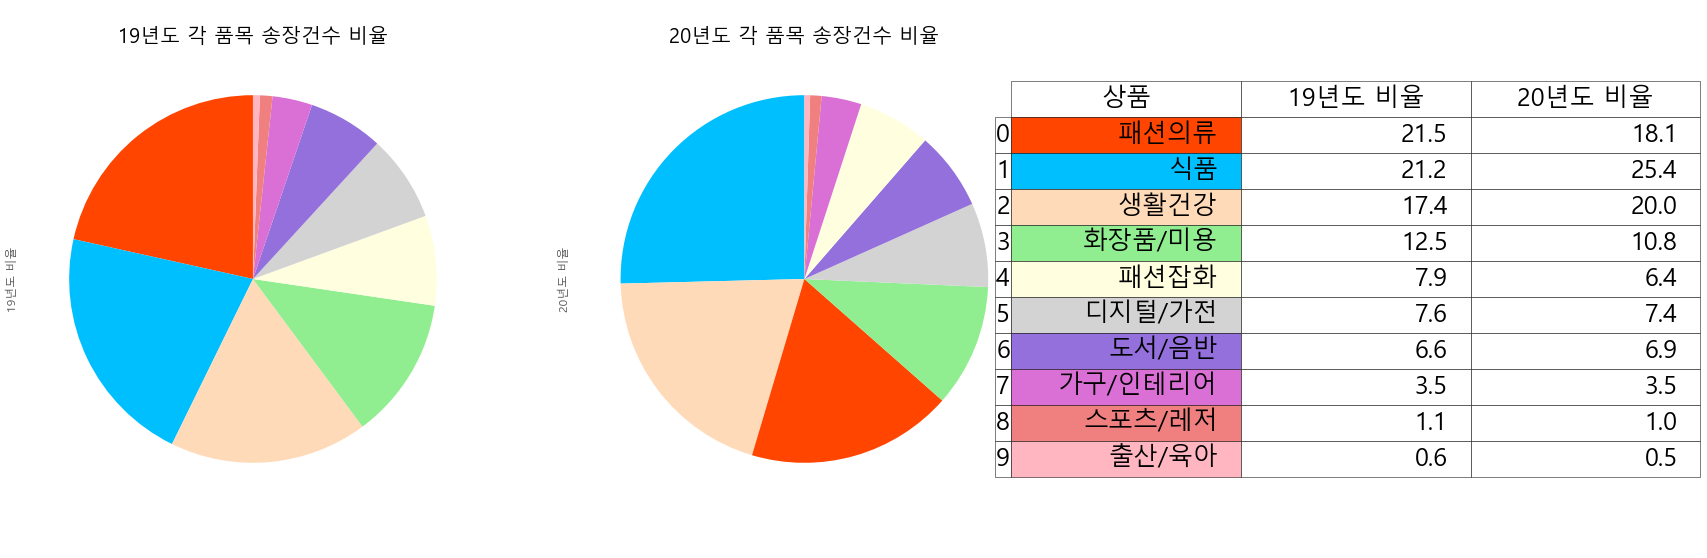

In [21]:
plt.figure(figsize=(28,10))
color1=['orangered','deepskyblue','peachpuff','lightgreen','lightyellow','lightgray','mediumpurple','orchid','lightcoral','lightpink']
color2=['deepskyblue','peachpuff','orangered','lightgreen','lightgray','mediumpurple','lightyellow','orchid','lightcoral','lightpink']
# plot chart
ax1 = plt.subplot(1,3,1, aspect='equal')
df1.plot(kind='pie', y = '19년도 비율', ax=ax1, 
 startangle=90, shadow=False, labels=None,legend = False, fontsize=18,colors=color1)
plt.title("19년도 각 품목 송장건수 비율",fontsize=20)

ax2 = plt.subplot(1,3,2, aspect='equal')
df2.plot(kind='pie', y = '20년도 비율', ax=ax2, 
 startangle=90, shadow=False, labels=None,legend = False, fontsize=18,colors=color2)
plt.title("20년도 각 품목 송장건수 비율",fontsize=20)

# plot table
ax3 = plt.subplot(1,3,3)
plt.axis('off')
tbl = table(ax3, df3, loc='center')
for i in range(10):
    tbl._cells[(i+1, 0)].set_facecolor(color1[i])
tbl.scale(1.5, 3.0)
tbl.auto_set_font_size(False)
tbl.set_fontsize(25)
plt.show()

## 지역별 식품 송장건수 추이
20년도에 전체적으로 급격하게 증가한걸 알 수 있다.

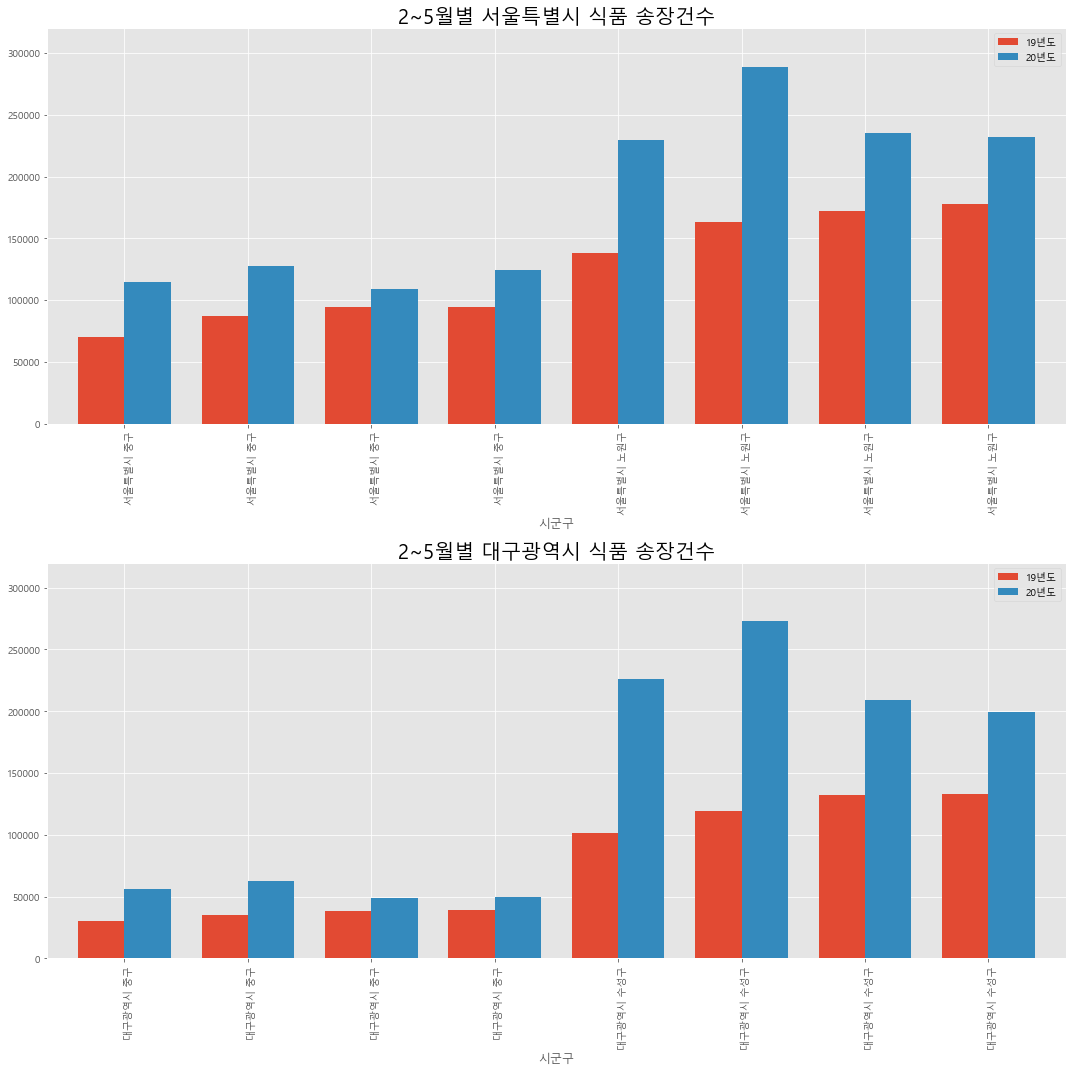

In [58]:
fig,axes=plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(15,15)

food_19=delivery_19[(delivery_19['상품'] == '식품')& (delivery_19['시도']=='서울특별시')]
seoul_food=pd.DataFrame(food_19['송장건수'].groupby([food_19['배송년월'],food_19['시군구']]).sum())
seoul_food.sort_values(by=['시군구'],axis=0,ascending=False,inplace=True)
seoul_food.reset_index(inplace=True)

food_20 = delivery_20[(delivery_20['상품'] == '식품')& (delivery_20['시도']=='서울특별시')]
fo20=pd.DataFrame(food_20['송장건수'].groupby([food_20['배송년월'],food_20['시군구']]).sum())
fo20.sort_values(by=['시군구'],axis=0,ascending=False,inplace=True)
fo20.reset_index(inplace=True)
seoul_food['20년도']=list(fo20['송장건수'])
seoul_food.rename(columns = {"송장건수": "19년도"}, inplace = True)
seoul_food.set_index(seoul_food['시군구'],inplace=True)

seoul_food.plot(kind='bar',width=0.75,ax=axes[0])
axes[0].set_ylim(0,320000)
plt.setp(axes[0].get_xticklabels(), rotation=90, ha='left')

axes[0].set_title('2~5월별 서울특별시 식품 송장건수',size=20)

food_19=delivery_19[(delivery_19['상품'] == '식품')& (delivery_19['시도']=='대구광역시')]
daegu_food=pd.DataFrame(food_19['송장건수'].groupby([food_19['배송년월'],food_19['시군구']]).sum())
daegu_food.sort_values(by=['시군구'],axis=0,ascending=False,inplace=True)
daegu_food.reset_index(inplace=True)

food_20 = delivery_20[(delivery_20['상품'] == '식품')& (delivery_20['시도']=='대구광역시')]
fo20=pd.DataFrame(food_20['송장건수'].groupby([food_20['배송년월'],food_20['시군구']]).sum())
fo20.sort_values(by=['시군구'],axis=0,ascending=False,inplace=True)
fo20.reset_index(inplace=True)
daegu_food['20년도']=list(fo20['송장건수'])
daegu_food.rename(columns = {"송장건수": "19년도"}, inplace = True)
daegu_food.set_index(daegu_food['시군구'],inplace=True)

daegu_food.plot(kind='bar',width=0.75,ax=axes[1])
plt.setp(axes[1].get_xticklabels(), rotation=90, ha='left')
axes[1].set_ylim(0,320000)
axes[1].set_title('2~5월별 대구광역시 식품 송장건수',size=20)
         
plt.tight_layout()
plt.show()

## 지역별 생활건강 송장건수
20년도에 전체적으로 증가한 것을 알 수 있다.

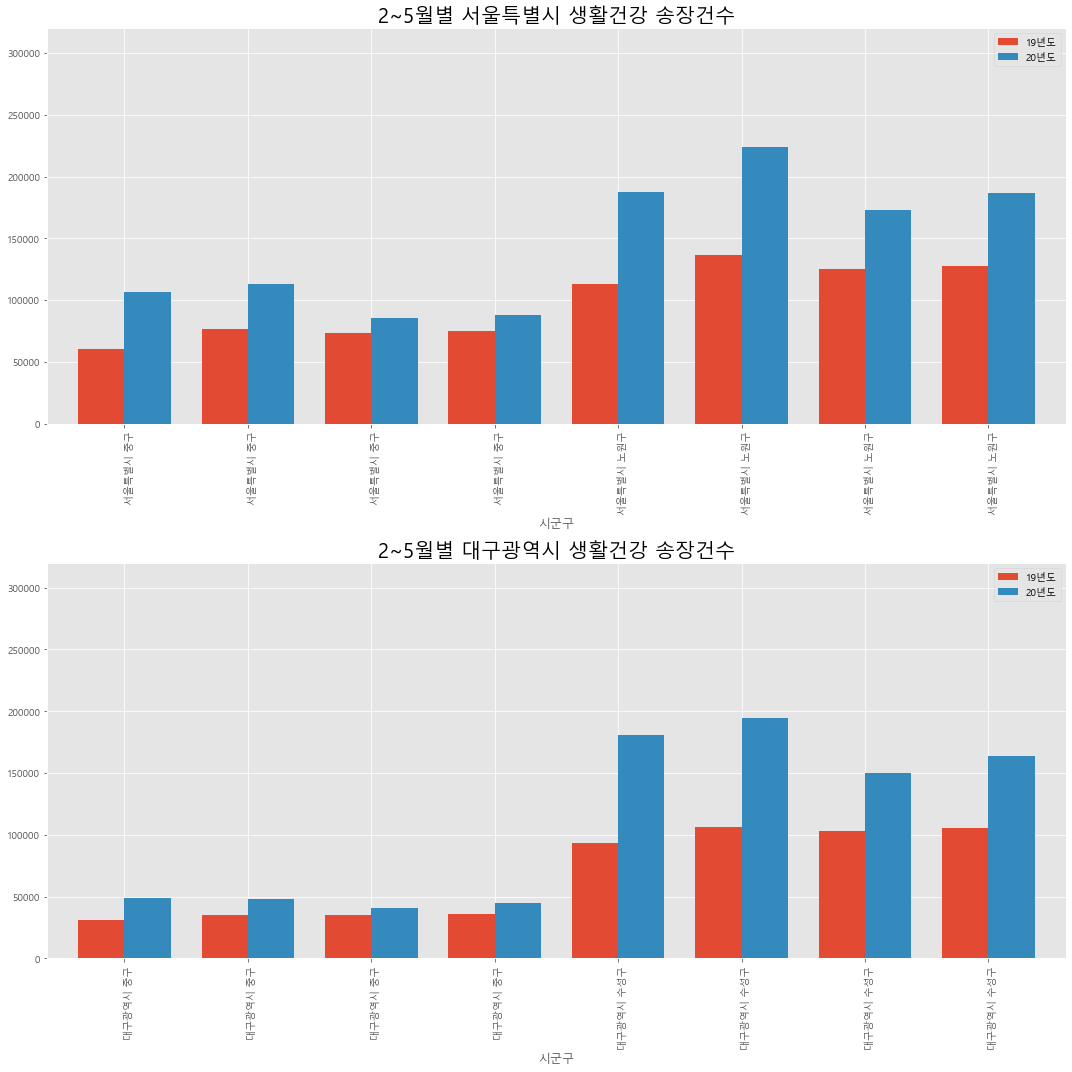

In [23]:
fig,axes=plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(15,15)

food_19=delivery_19[(delivery_19['상품'] == '생활건강')& (delivery_19['시도']=='서울특별시')]
seoul_food=pd.DataFrame(food_19['송장건수'].groupby([food_19['배송년월'],food_19['시군구']]).sum())
seoul_food.sort_values(by=['시군구'],axis=0,ascending=False,inplace=True)
seoul_food.reset_index(inplace=True)

food_20 = delivery_20[(delivery_20['상품'] == '생활건강')& (delivery_20['시도']=='서울특별시')]
fo20=pd.DataFrame(food_20['송장건수'].groupby([food_20['배송년월'],food_20['시군구']]).sum())
fo20.sort_values(by=['시군구'],axis=0,ascending=False,inplace=True)
fo20.reset_index(inplace=True)
seoul_food['20년도']=list(fo20['송장건수'])
seoul_food.rename(columns = {"송장건수": "19년도"}, inplace = True)
seoul_food.set_index(seoul_food['시군구'],inplace=True)

seoul_food.plot(kind='bar',width=0.75,ax=axes[0])
axes[0].set_ylim(0,320000)
plt.setp(axes[0].get_xticklabels(), rotation=90, ha='left')

axes[0].set_title('2~5월별 서울특별시 생활건강 송장건수',size=20)

food_19=delivery_19[(delivery_19['상품'] == '생활건강')& (delivery_19['시도']=='대구광역시')]
daegu_food=pd.DataFrame(food_19['송장건수'].groupby([food_19['배송년월'],food_19['시군구']]).sum())
daegu_food.sort_values(by=['시군구'],axis=0,ascending=False,inplace=True)
daegu_food.reset_index(inplace=True)

food_20 = delivery_20[(delivery_20['상품'] == '생활건강')& (delivery_20['시도']=='대구광역시')]
fo20=pd.DataFrame(food_20['송장건수'].groupby([food_20['배송년월'],food_20['시군구']]).sum())
fo20.sort_values(by=['시군구'],axis=0,ascending=False,inplace=True)
fo20.reset_index(inplace=True)
daegu_food['20년도']=list(fo20['송장건수'])
daegu_food.rename(columns = {"송장건수": "19년도"}, inplace = True)
daegu_food.set_index(daegu_food['시군구'],inplace=True)

daegu_food.plot(kind='bar',width=0.75,ax=axes[1])
plt.setp(axes[1].get_xticklabels(), rotation=90, ha='left')
axes[1].set_ylim(0,320000)
axes[1].set_title('2~5월별 대구광역시 생활건강 송장건수',size=20)
         
plt.tight_layout()
plt.show()

## 지역별 화장품/미용 송장건수
20년도에 전체적으로 증가한 것을 알 수 있다.

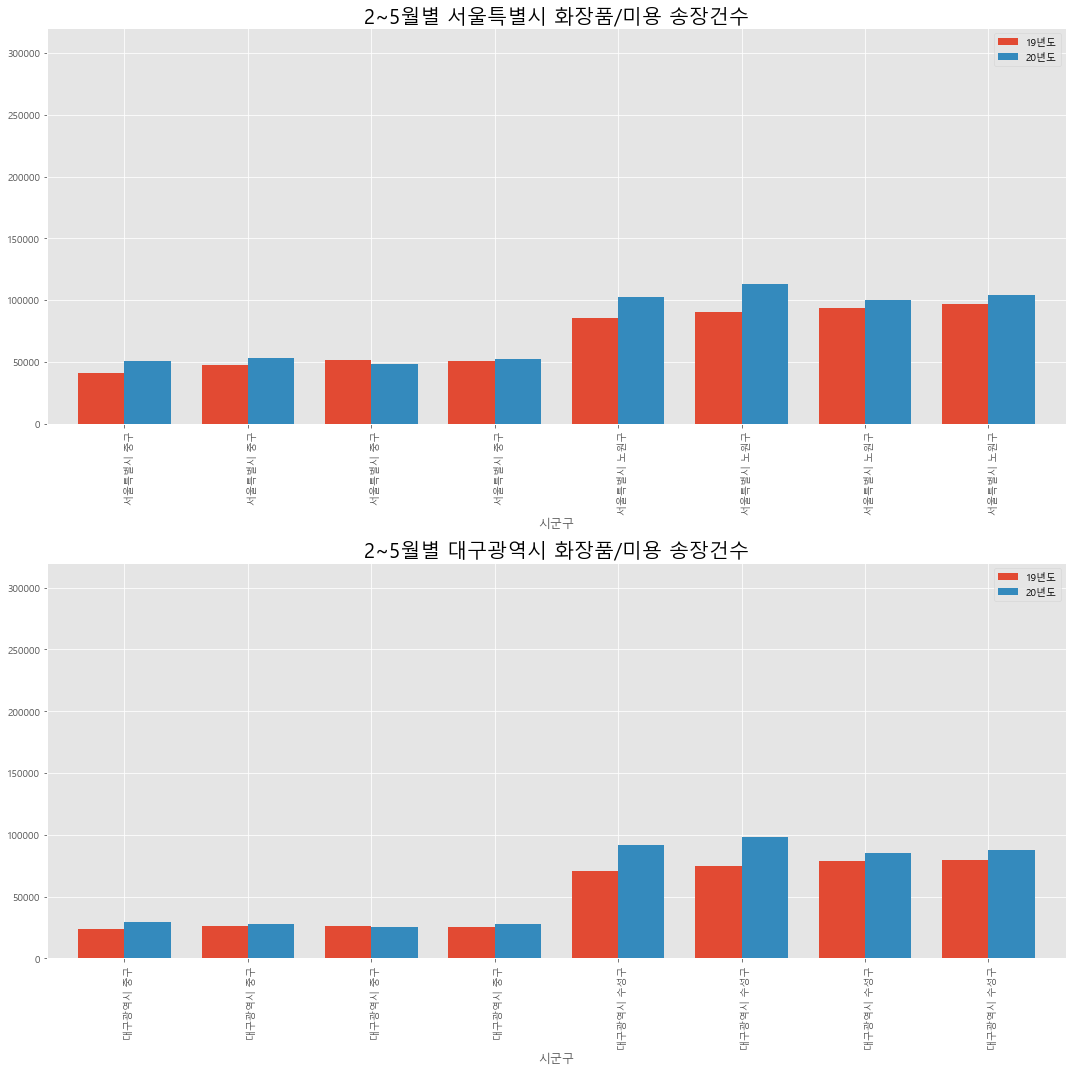

In [24]:
fig,axes=plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(15,15)

food_19=delivery_19[(delivery_19['상품'] == '화장품/미용')& (delivery_19['시도']=='서울특별시')]
seoul_food=pd.DataFrame(food_19['송장건수'].groupby([food_19['배송년월'],food_19['시군구']]).sum())
seoul_food.sort_values(by=['시군구'],axis=0,ascending=False,inplace=True)
seoul_food.reset_index(inplace=True)

food_20 = delivery_20[(delivery_20['상품'] == '화장품/미용')& (delivery_20['시도']=='서울특별시')]
fo20=pd.DataFrame(food_20['송장건수'].groupby([food_20['배송년월'],food_20['시군구']]).sum())
fo20.sort_values(by=['시군구'],axis=0,ascending=False,inplace=True)
fo20.reset_index(inplace=True)
seoul_food['20년도']=list(fo20['송장건수'])
seoul_food.rename(columns = {"송장건수": "19년도"}, inplace = True)
seoul_food.set_index(seoul_food['시군구'],inplace=True)

seoul_food.plot(kind='bar',width=0.75,ax=axes[0])
plt.setp(axes[0].get_xticklabels(), rotation=90, ha='left')
axes[0].set_ylim(0,320000)
axes[0].set_title('2~5월별 서울특별시 화장품/미용 송장건수',size=20)

food_19=delivery_19[(delivery_19['상품'] == '화장품/미용')& (delivery_19['시도']=='대구광역시')]
daegu_food=pd.DataFrame(food_19['송장건수'].groupby([food_19['배송년월'],food_19['시군구']]).sum())
daegu_food.sort_values(by=['시군구'],axis=0,ascending=False,inplace=True)
daegu_food.reset_index(inplace=True)

food_20 = delivery_20[(delivery_20['상품'] == '화장품/미용')& (delivery_20['시도']=='대구광역시')]
fo20=pd.DataFrame(food_20['송장건수'].groupby([food_20['배송년월'],food_20['시군구']]).sum())
fo20.sort_values(by=['시군구'],axis=0,ascending=False,inplace=True)
fo20.reset_index(inplace=True)
daegu_food['20년도']=list(fo20['송장건수'])
daegu_food.rename(columns = {"송장건수": "19년도"}, inplace = True)
daegu_food.set_index(daegu_food['시군구'],inplace=True)

daegu_food.plot(kind='bar',width=0.75,ax=axes[1])
plt.setp(axes[1].get_xticklabels(), rotation=90, ha='left')
axes[1].set_ylim(0,320000)
axes[1].set_title('2~5월별 대구광역시 화장품/미용 송장건수',size=20)
         
plt.tight_layout()
plt.show()

# 지역별 패션의류 송장건수
3월, 4월 서울특별시 중구와 대구광역시 중구 패션의류 송장건수가 감소한 것을 알 수 있다.

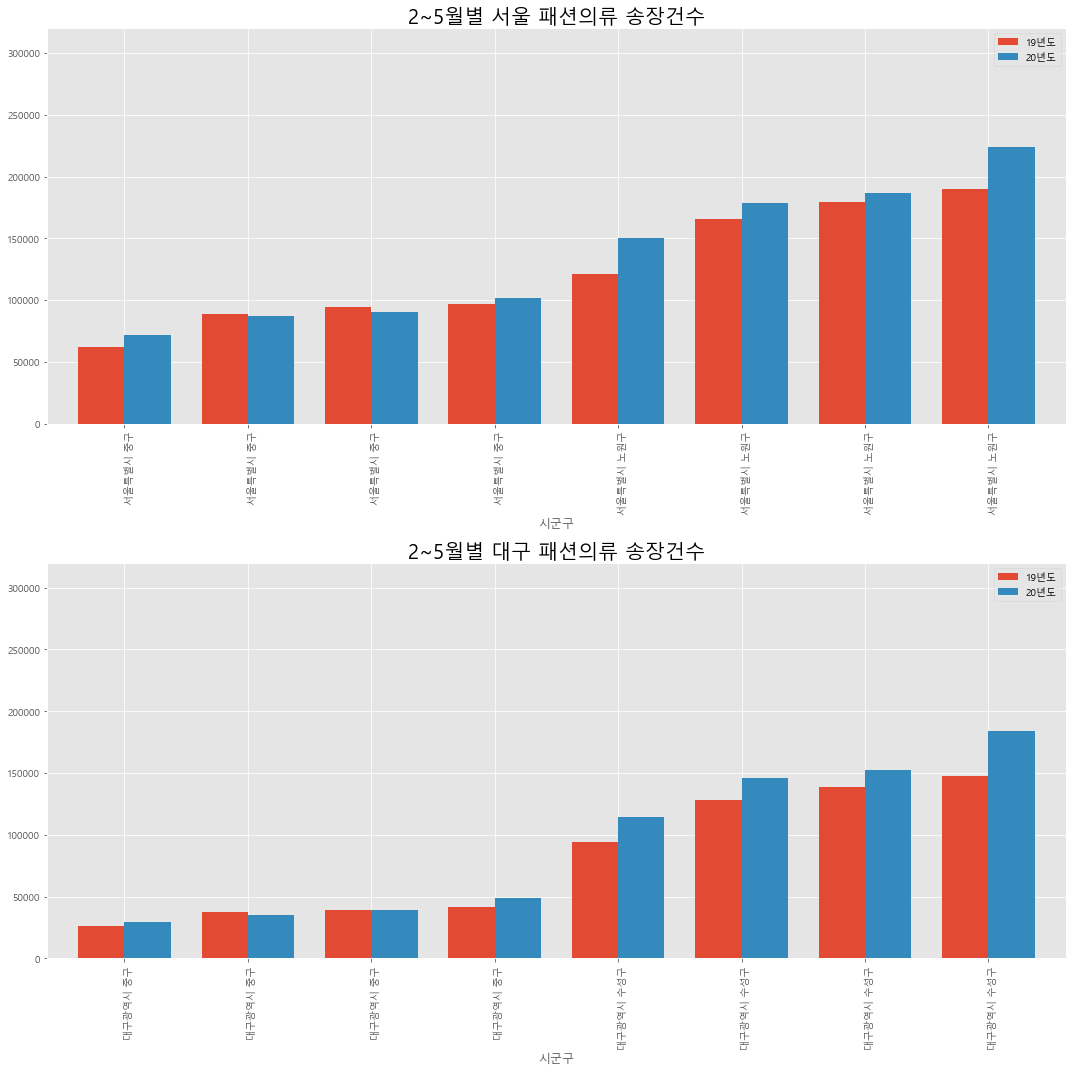

In [25]:
fig,axes=plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(15,15)

food_19=delivery_19[(delivery_19['상품'] == '패션의류')& (delivery_19['시도']=='서울특별시')]
seoul_food=pd.DataFrame(food_19['송장건수'].groupby([food_19['배송년월'],food_19['시군구']]).sum())
seoul_food.sort_values(by=['시군구'],axis=0,ascending=False,inplace=True)
seoul_food.reset_index(inplace=True)

food_20 = delivery_20[(delivery_20['상품'] == '패션의류')& (delivery_20['시도']=='서울특별시')]
fo20=pd.DataFrame(food_20['송장건수'].groupby([food_20['배송년월'],food_20['시군구']]).sum())
fo20.sort_values(by=['시군구'],axis=0,ascending=False,inplace=True)
fo20.reset_index(inplace=True)
seoul_food['20년도']=list(fo20['송장건수'])
seoul_food.rename(columns = {"송장건수": "19년도"}, inplace = True)
seoul_food.set_index(seoul_food['시군구'],inplace=True)

seoul_food.plot(kind='bar',width=0.75,ax=axes[0])
axes[0].set_ylim(0,320000)
plt.setp(axes[0].get_xticklabels(), rotation=90, ha='left')
axes[0].set_title('2~5월별 서울 패션의류 송장건수',size=20)

food_19=delivery_19[(delivery_19['상품'] == '패션의류')& (delivery_19['시도']=='대구광역시')]
daegu_food=pd.DataFrame(food_19['송장건수'].groupby([food_19['배송년월'],food_19['시군구']]).sum())
daegu_food.sort_values(by=['시군구'],axis=0,ascending=False,inplace=True)
daegu_food.reset_index(inplace=True)

food_20 = delivery_20[(delivery_20['상품'] == '패션의류')& (delivery_20['시도']=='대구광역시')]
fo20=pd.DataFrame(food_20['송장건수'].groupby([food_20['배송년월'],food_20['시군구']]).sum())
fo20.sort_values(by=['시군구'],axis=0,ascending=False,inplace=True)
fo20.reset_index(inplace=True)
daegu_food['20년도']=list(fo20['송장건수'])
daegu_food.rename(columns = {"송장건수": "19년도"}, inplace = True)
daegu_food.set_index(daegu_food['시군구'],inplace=True)

daegu_food.plot(kind='bar',width=0.75,ax=axes[1])
plt.setp(axes[1].get_xticklabels(), rotation=90, ha='left')
axes[1].set_ylim(0,320000)
axes[1].set_title('2~5월별 대구 패션의류 송장건수',size=20)
         
plt.tight_layout()
plt.show()

# 시군구별 송장건수 합계
송장건수가 점점 증가하고 있는 추세이다.

In [26]:
total = pd.DataFrame(delivery1['송장건수'].groupby([delivery1['배송년월'],delivery1['시군구']]).sum().unstack())
total

시군구,대구광역시 수성구,대구광역시 중구,서울특별시 노원구,서울특별시 중구
배송년월,,,,
1902,510379,153773,629290,333705
1903,600659,184920,760699,431032
1904,616633,187732,766483,439432
1905,630359,190485,786038,442032
2002,797195,209783,874969,466969
2003,958504,227700,1062157,515888
2004,820465,208695,934020,475407
2005,866619,229605,998296,515551


# 특별시별 송장건수 합계
전체적으로 송장건수가 증가하는 것을 볼 수 있다.

Text(0.5, 1.0, '대구광역시 송장건수 합계')

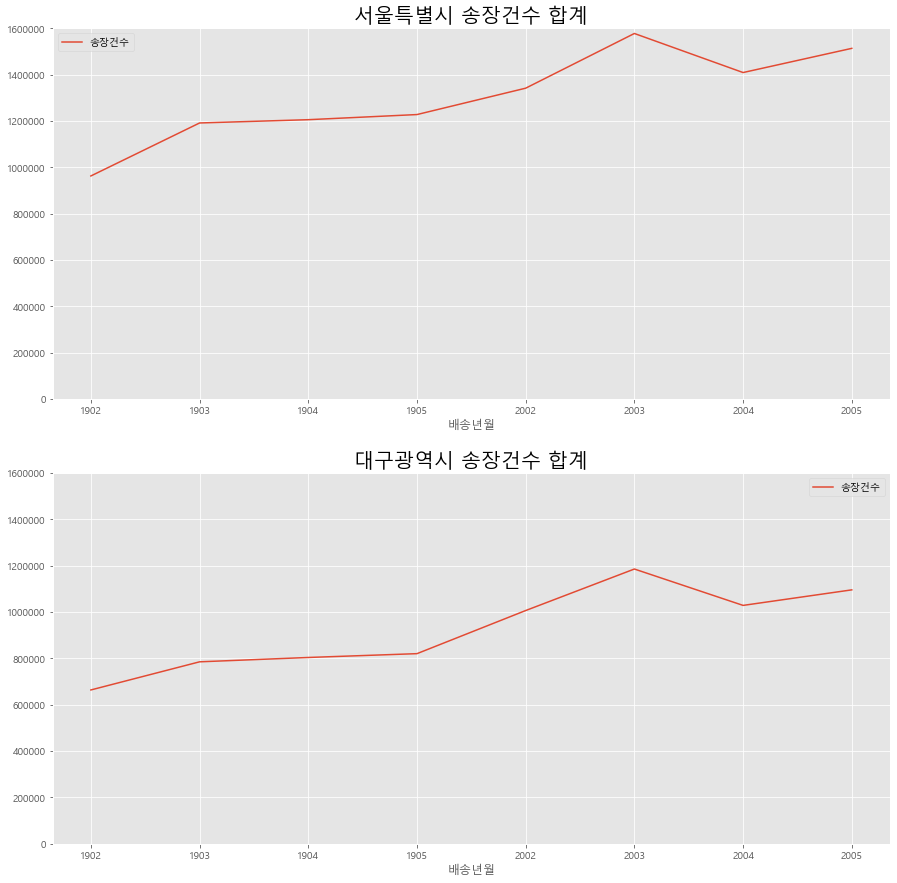

In [30]:
fig,axes=plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(15,15)

seoul_t=delivery1[delivery1['시도']=='서울특별시']
seoul_total=pd.DataFrame(seoul_t['송장건수'].groupby(seoul_t['배송년월']).sum())
seoul_total.plot(ax=axes[0])
axes[0].set_ylim(0,1600000)
axes[0].set_title('서울특별시 송장건수 합계',size=20)

deagu_t=delivery1[delivery1['시도']=='대구광역시']
deagu_total=pd.DataFrame(deagu_t['송장건수'].groupby(deagu_t['배송년월']).sum())
deagu_total.plot(ax=axes[1])
axes[1].set_ylim(0,1600000)
axes[1].set_title('대구광역시 송장건수 합계',size=20)

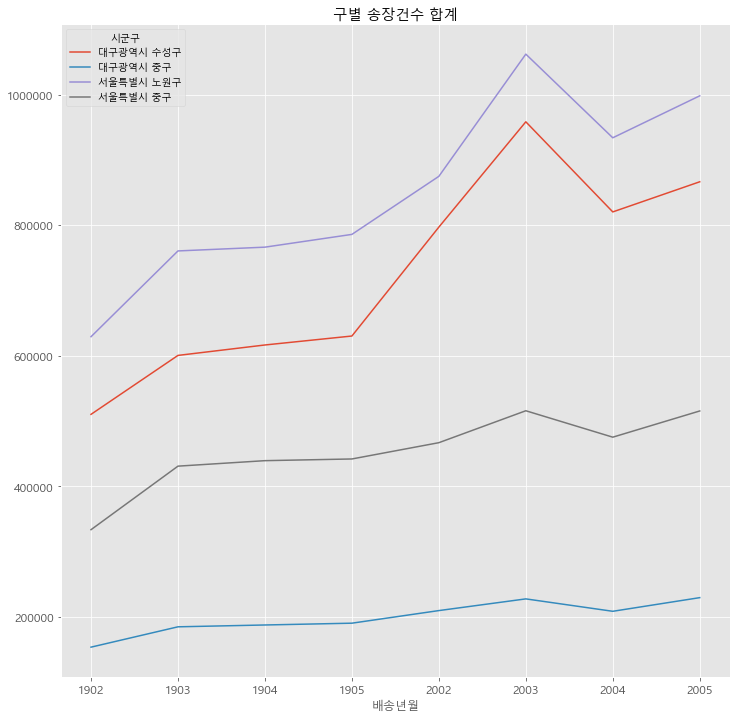

In [27]:
total.plot(figsize=(12,12),title='구별 송장건수 합계',fontsize=12)

# 월별 송장건수 합계
20년도 3월에 급격하게 증가했다가 그 이후로 비슷한 추이로 가고 있다.

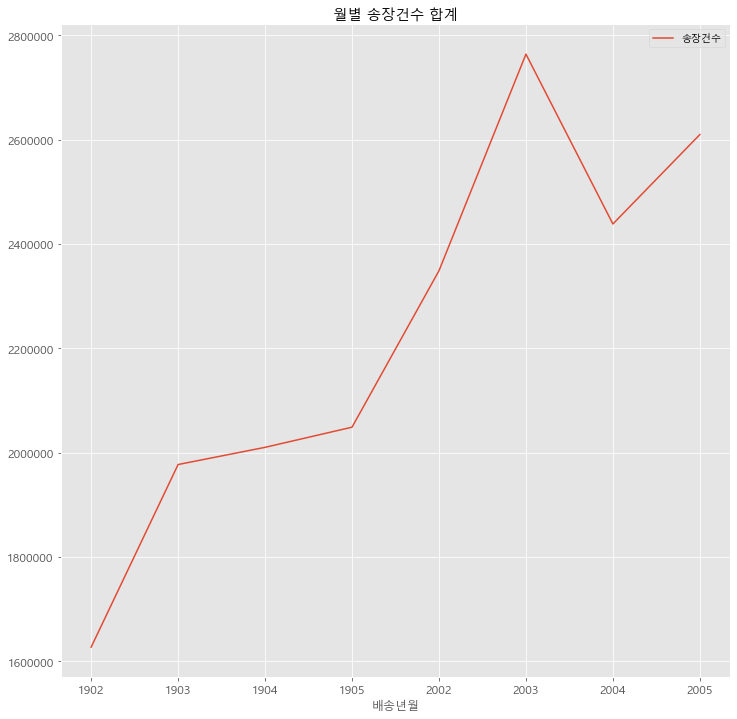

In [28]:
total1=pd.DataFrame(delivery1['송장건수'].groupby(delivery1['배송년월']).sum())
total1.plot(figsize=(12,12),title='월별 송장건수 합계',fontsize=12)

# 시, 상품별 송장건수 합계
식품 송장건수가 20년도에 들어 압도적으로 1위하였다.

Text(0.5, 1.0, '대구광역시  상품별 송장건수')

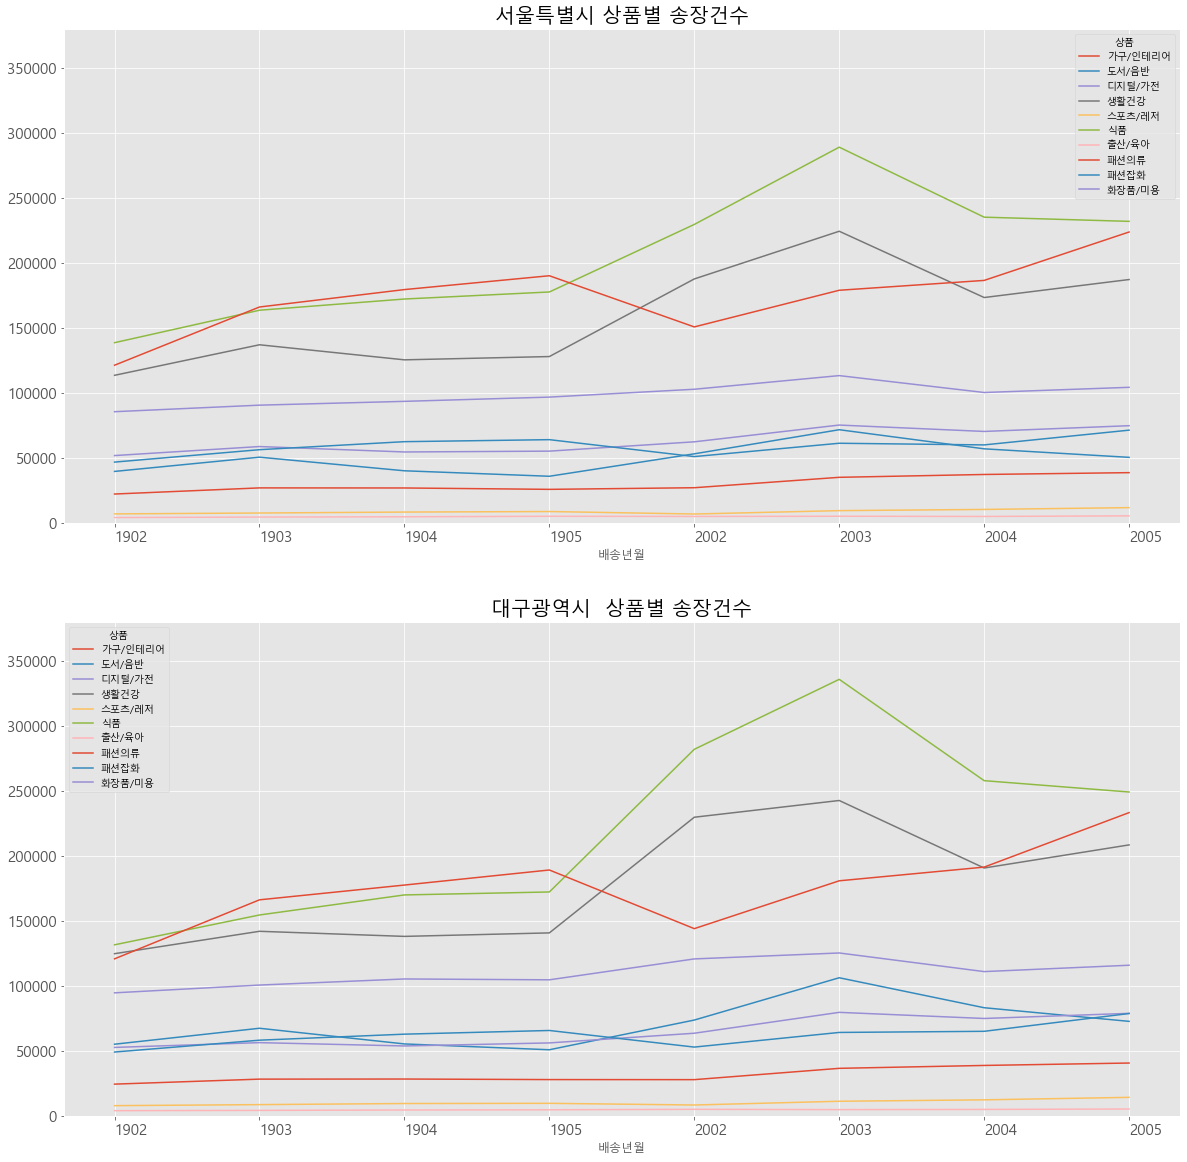

In [31]:
fig,axes=plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(20,20)

seoul12=delivery1[delivery1['시도']=='서울특별시']
seoul12_item=pd.DataFrame(seoul12['송장건수'].groupby([seoul12['배송년월'],seoul1['상품']]).sum().unstack())
seoul12_item.plot(ax=axes[0],fontsize=15)
plt.setp(axes[0].get_xticklabels(), rotation=0, ha='left')
axes[0].set_ylim(0,380000)
axes[0].set_title('서울특별시 상품별 송장건수',size=20)

daegu1=delivery1[delivery1['시도']=='대구광역시']
daegu1_item=pd.DataFrame(daegu1['송장건수'].groupby([daegu1['배송년월'],daegu1['상품']]).sum().unstack())
daegu1_item.plot(ax=axes[1],fontsize=15)
plt.setp(axes[1].get_xticklabels(), rotation=0, ha='left')
axes[1].set_ylim(0,380000)
axes[1].set_title('대구광역시  상품별 송장건수',size=20)


# 시군구 상품별 송장건수
식품 송장건수가 급격하게 증가하여 20년도에는 모든지역에서 송장건수 1위를 차지하고 있다.

Text(0.5, 1.0, '대구광역시 중구 상품별 송장건수')

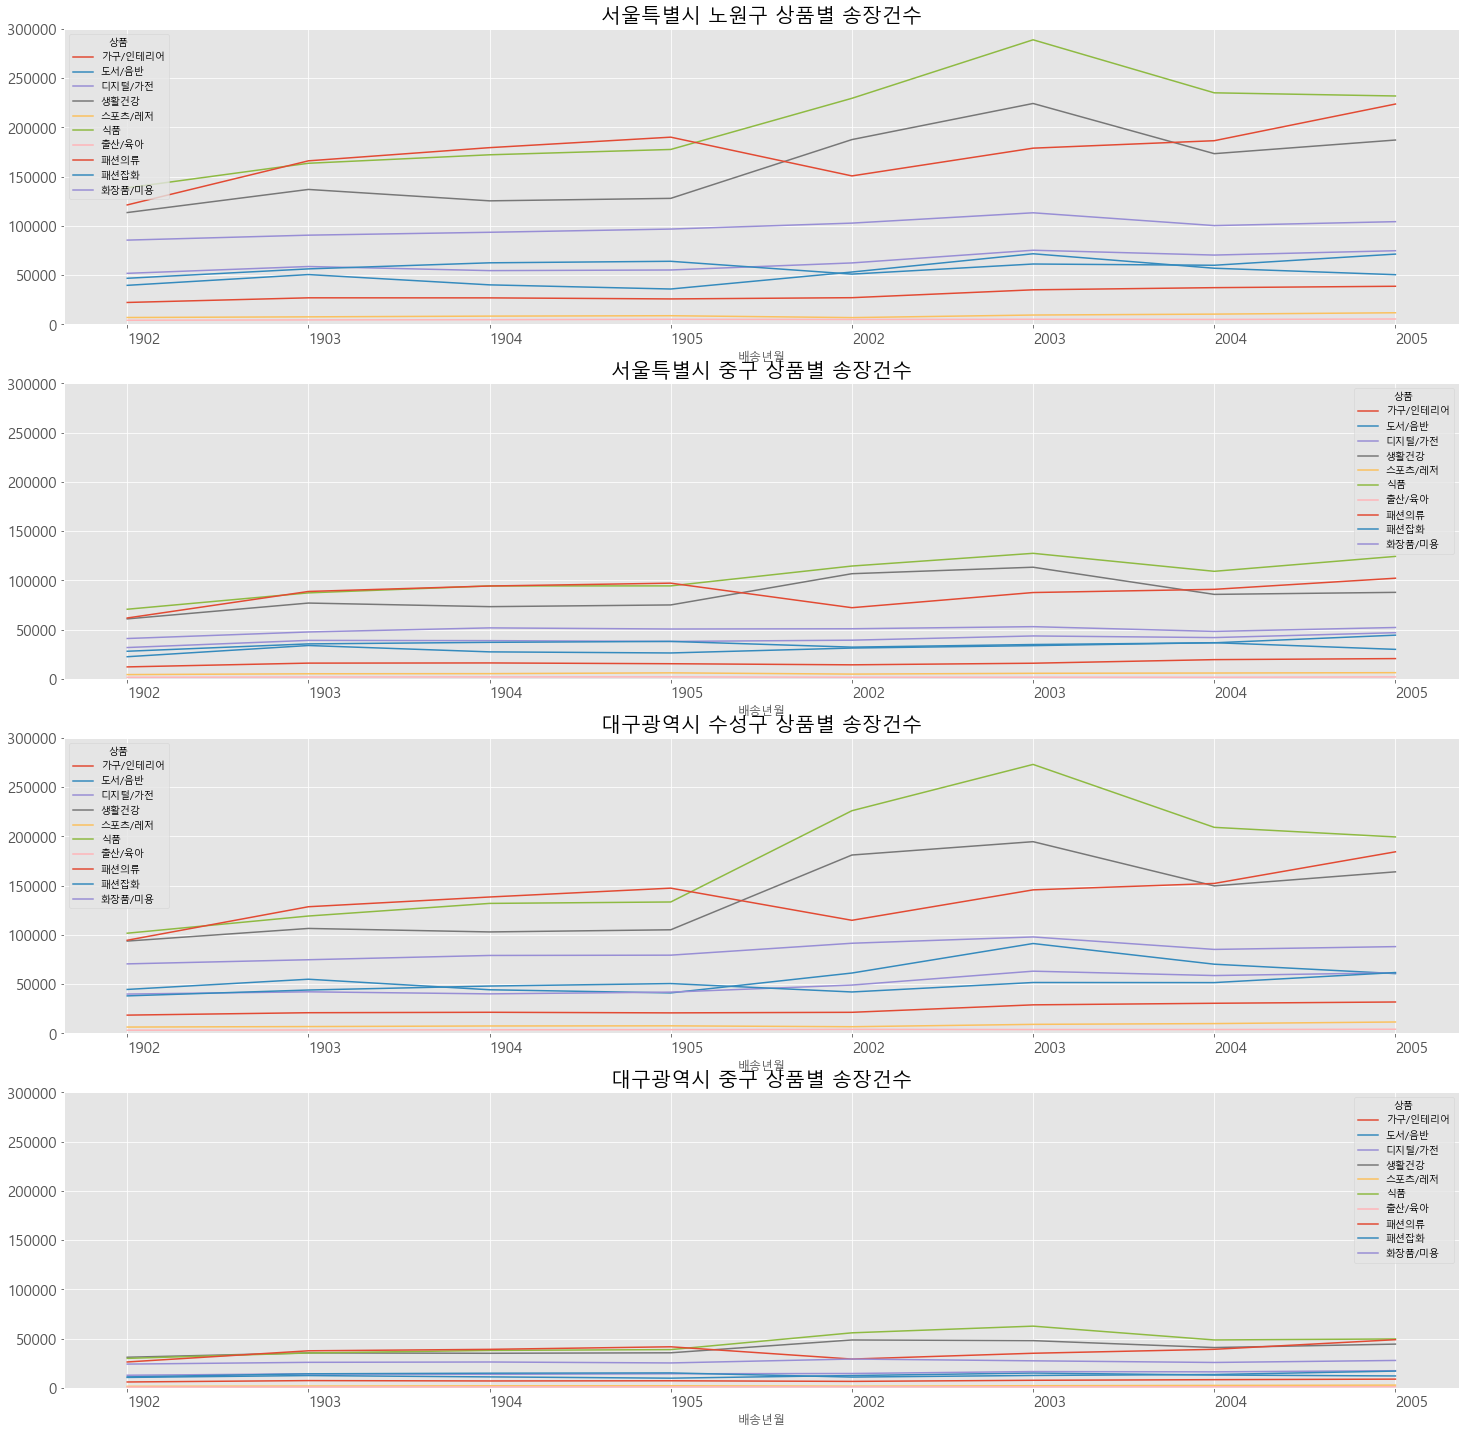

In [29]:
fig,axes=plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(25,25)

seoul1=delivery1[delivery1['시군구']=='서울특별시 노원구']
seoul1_item=pd.DataFrame(seoul1['송장건수'].groupby([seoul1['배송년월'],seoul1['상품']]).sum().unstack())
seoul1_item.plot(ax=axes[0],fontsize=15)
plt.setp(axes[0].get_xticklabels(), rotation=0, ha='left')
axes[0].set_ylim(0,300000)
axes[0].set_title('서울특별시 노원구 상품별 송장건수',size=20)

seoul2=delivery1[delivery1['시군구']=='서울특별시 중구']
seoul2_item=pd.DataFrame(seoul2['송장건수'].groupby([seoul2['배송년월'],seoul2['상품']]).sum().unstack())
seoul2_item.plot(ax=axes[1],fontsize=15)
plt.setp(axes[1].get_xticklabels(), rotation=0, ha='left')
axes[1].set_ylim(0,300000)
axes[1].set_title('서울특별시 중구 상품별 송장건수',size=20)

daegu1=delivery1[delivery1['시군구']=='대구광역시 수성구']
daegu1_item=pd.DataFrame(daegu1['송장건수'].groupby([daegu1['배송년월'],daegu1['상품']]).sum().unstack())
daegu1_item.plot(ax=axes[2],fontsize=15)
plt.setp(axes[2].get_xticklabels(), rotation=0, ha='left')
axes[2].set_ylim(0,300000)
axes[2].set_title('대구광역시 수성구 상품별 송장건수',size=20)

daegu2=delivery1[delivery1['시군구']=='대구광역시 중구']
daegu2_item=pd.DataFrame(daegu2['송장건수'].groupby([daegu2['배송년월'],daegu2['상품']]).sum().unstack())
daegu2_item.plot(ax=axes[3],fontsize=15)
plt.setp(axes[3].get_xticklabels(), rotation=0, ha='left')
axes[3].set_ylim(0,300000)
axes[3].set_title('대구광역시 중구 상품별 송장건수',size=20)

# 성남시 확진자 추이
출처: http://www.gidcc.or.kr/%EC%BD%94%EB%A1%9C%EB%82%98covid-19-%ED%98%84%ED%99%A9/

In [32]:
nam=pd.read_csv('1-1_data.csv',encoding='utf-8')
nam=nam.rename(columns={'기준일(발병일, 확진일 선택)' : "년월일", '레코드 수': '확진자'})
nam=nam.sort_index(ascending=False)
nam['월'] = nam.년월일.apply(lambda x : str(x)[6])
nam
nam1=pd.DataFrame(nam['확진자'].groupby([nam['월']]).sum())
nam1

,확진자
월,
2,3
3,110
4,13
5,8
6,41
7,13
8,75


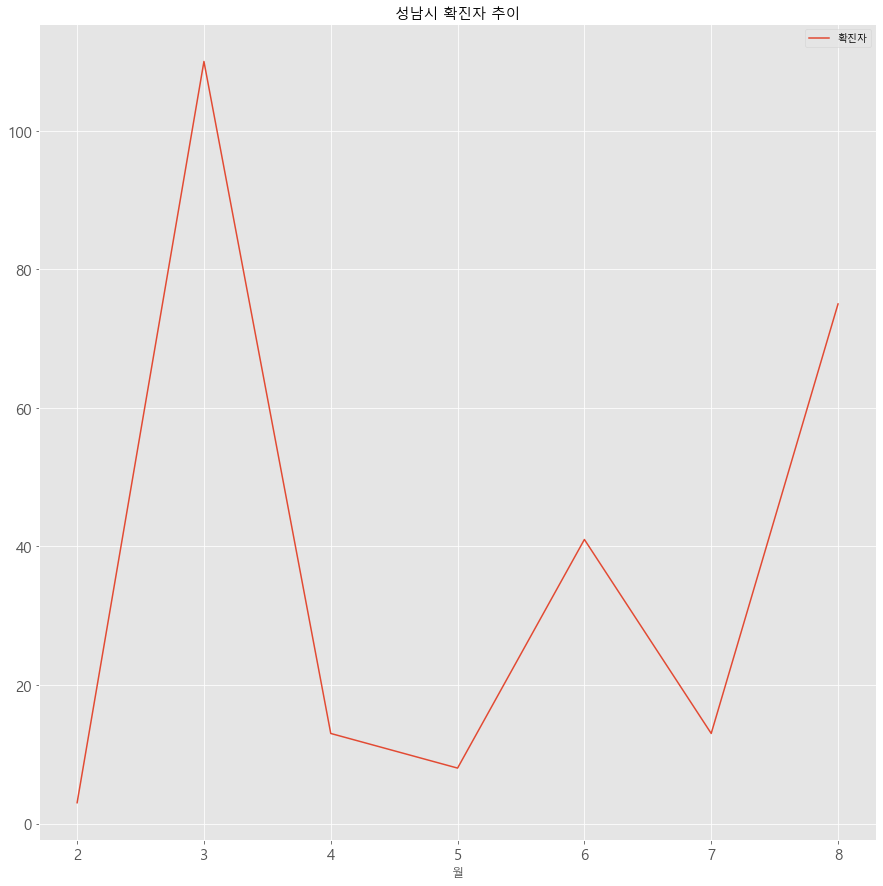

In [33]:
nam1.plot(figsize=(15,15),fontsize=15,title='성남시 확진자 추이')